In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_excel("Employees.xlsx")

In [144]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,43194,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,43972,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,43006,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,43326,6,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,43901,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [145]:
data.dtypes

No                  int64
First Name         object
Last Name          object
Gender             object
Start Date          int64
Years               int64
Department         object
Country            object
Center             object
Monthly Salary      int64
Annual Salary       int64
Job Rate          float64
Sick Leaves         int64
Unpaid Leaves       int64
Overtime Hours      int64
dtype: object

In [146]:
data.info()       #show all entities or column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              689 non-null    int64  
 1   First Name      689 non-null    object 
 2   Last Name       689 non-null    object 
 3   Gender          689 non-null    object 
 4   Start Date      689 non-null    int64  
 5   Years           689 non-null    int64  
 6   Department      689 non-null    object 
 7   Country         689 non-null    object 
 8   Center          689 non-null    object 
 9   Monthly Salary  689 non-null    int64  
 10  Annual Salary   689 non-null    int64  
 11  Job Rate        689 non-null    float64
 12  Sick Leaves     689 non-null    int64  
 13  Unpaid Leaves   689 non-null    int64  
 14  Overtime Hours  689 non-null    int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 80.9+ KB


In [147]:
data.shape     #for rows count and column count

(689, 15)

In [148]:
data.isna().sum()   #return the count sum of NA values / also from here data cleaning starts

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [149]:
#data.dropna(inplace=True) for dropping NA values in the dataset
#inplace = means remove the value or na from the dataset itself no need to create a separate data frame

In [150]:
data.duplicated().sum()      #if two rows are full same then we can identify them duplicate 

np.int64(0)

In [151]:
#data.drop_duplicates(inplace = True) for dropping duplicates  or use data.drop_duplicates(keep="first")

In [ ]:
# Remove multiple columns
data = data.drop(columns=["No", "First Name", "Last Name", "Start Date"])

In [202]:
#rename the column 
data = data.rename(columns={"Years": "Experience Years"})

In [203]:
data.head()

,Gender,Experience Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Gender_Encode,Department_Encode,Country_Encode,Center_Encode,Job_Rate_Scaled,Department_Scaled
0,Male,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183,1,15,0,4,-0.434614,1.092952
1,Male,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198,1,15,2,4,-1.917035,1.092952
2,Female,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192,0,8,2,4,-1.175824,-0.200620
3,Male,6,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7,1,9,4,1,-0.434614,-0.015824
4,Male,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121,1,9,0,1,1.047807,-0.015824


In [204]:
#Correlation Matrix among Numerical Features.
corr = data[["Experience Years", "Annual Salary", "Job Rate"]].corr()
corr

,Experience Years,Annual Salary,Job Rate
Experience Years,1.000000,-0.020192,0.042792
Annual Salary,-0.020192,1.000000,-0.041030
Job Rate,0.042792,-0.041030,1.000000


<Axes: >

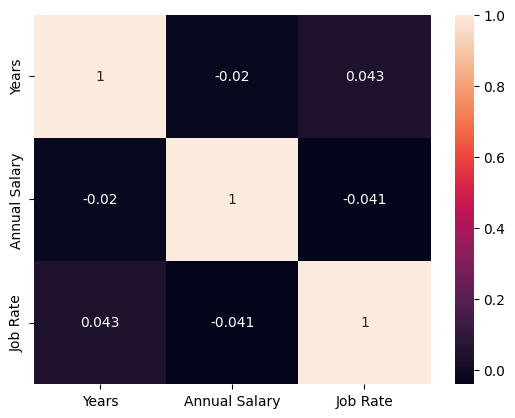

In [153]:
sns.heatmap(corr, annot = True)

<Axes: >

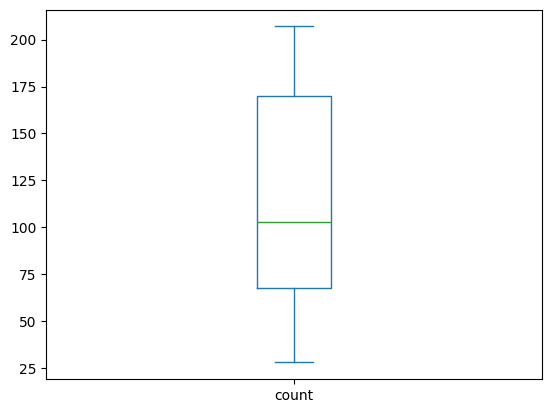

In [205]:
data["Experience Years"].value_counts().plot(kind="box")

<Axes: >

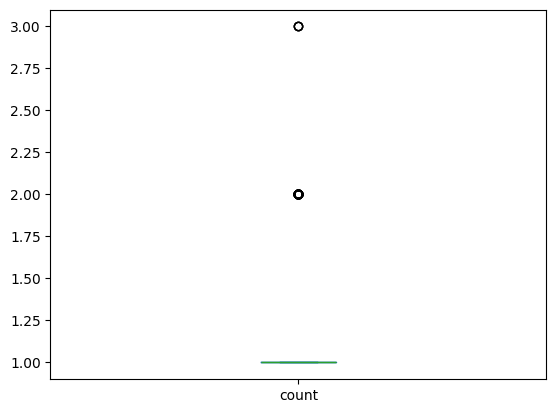

In [155]:
data["Monthly Salary"].value_counts().plot(kind="box")

In [156]:
# Remove top 5% salaries
threshold = data["Monthly Salary"].quantile(0.95)
data_cleaned = data[data["Monthly Salary"] <= threshold]

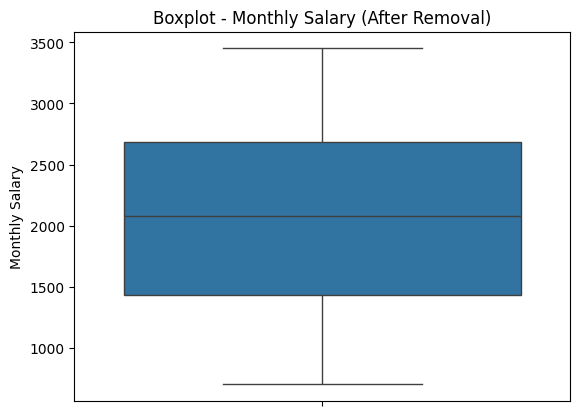

In [157]:
sns.boxplot(data["Monthly Salary"])
plt.title("Boxplot - Monthly Salary (After Removal)")
plt.show()

In [158]:
data["Gender"].value_counts()   #counts the unique value 

Gender
Male      449
Female    240
Name: count, dtype: int64

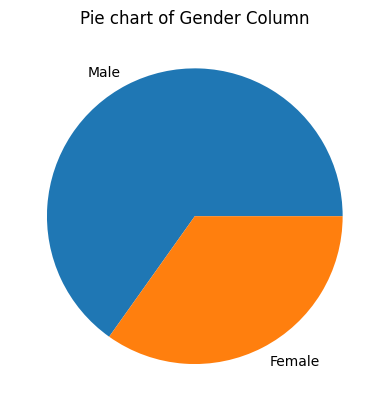

In [159]:
data["Gender"].value_counts().sort_values(ascending = False).plot(kind = "pie")
plt.title("Pie chart of Gender Column")
plt.ylabel("")
plt.show()

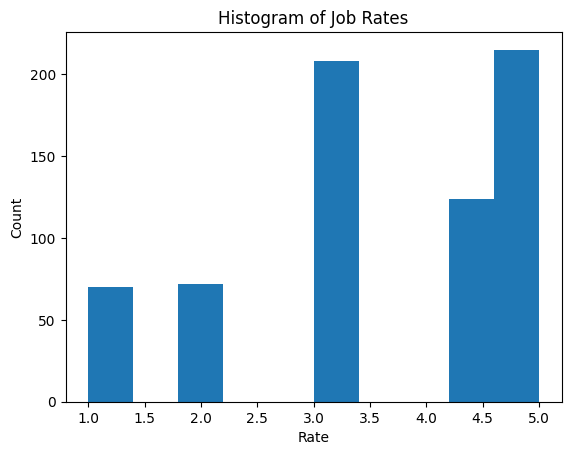

In [160]:
plt.hist(data["Job Rate"])
plt.title("Histogram of Job Rates")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [161]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

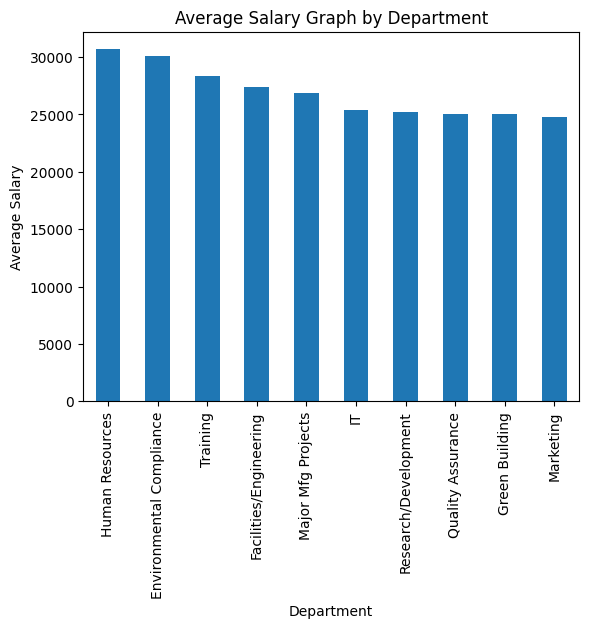

In [162]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Average Salary Graph by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

In [163]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=False)

Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [164]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

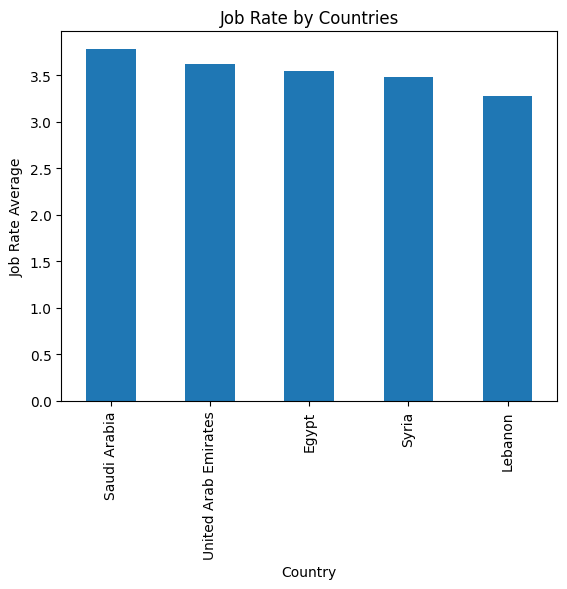

In [165]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Job Rate by Countries")
plt.xlabel("Country")
plt.ylabel("Job Rate Average")
plt.show()

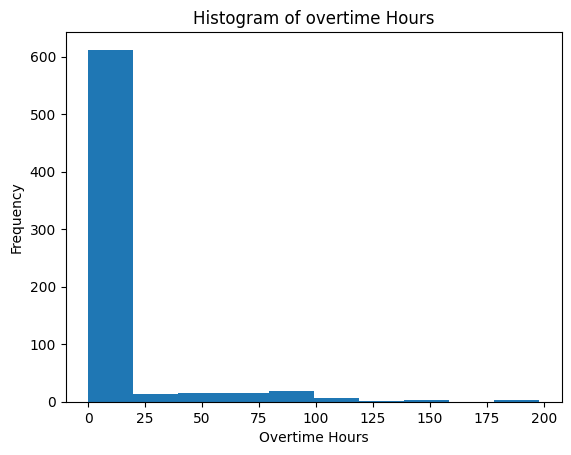

In [166]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of overtime Hours")
plt.xlabel("Overtime Hours")
plt.ylabel("Frequency")
plt.show()

In [167]:
data["Overtime Hours"].describe()

count    689.000000
mean      13.702467
std       25.692049
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max      198.000000
Name: Overtime Hours, dtype: float64

In [168]:
data["Annual Salary"].describe()

count      689.000000
mean     24818.420900
std       9159.470878
min       8436.000000
25%      17232.000000
50%      24924.000000
75%      32184.000000
max      41400.000000
Name: Annual Salary, dtype: float64

In [169]:
#Feature Engineering

In [170]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [206]:
data.head()

,Gender,Experience Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Gender_Encode,Department_Encode,Country_Encode,Center_Encode,Job_Rate_Scaled,Department_Scaled
0,Male,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183,1,15,0,4,-0.434614,1.092952
1,Male,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198,1,15,2,4,-1.917035,1.092952
2,Female,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192,0,8,2,4,-1.175824,-0.200620
3,Male,6,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7,1,9,4,1,-0.434614,-0.015824
4,Male,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121,1,9,0,1,1.047807,-0.015824


In [172]:
#Label Encoding 
data["Gender_Encode"] = Label_Encoder.fit_transform(data["Gender"])
data["Department_Encode"] = Label_Encoder.fit_transform(data["Department"])
data["Country_Encode"] = Label_Encoder.fit_transform(data["Country"])
data["Center_Encode"] = Label_Encoder.fit_transform(data["Center"])

In [211]:
#Data after Label Encoding
data.head(3)

,Gender,Experience Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Gender_Encode,Department_Encode,Country_Encode,Center_Encode,Job_Rate_Scaled,Department_Scaled
0,Male,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183,1,15,0,4,-0.434614,1.092952
1,Male,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198,1,15,2,4,-1.917035,1.092952
2,Female,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192,0,8,2,4,-1.175824,-0.200620


In [174]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [175]:
data["Job_Rate_Scaled"] = std_scaler.fit_transform(data[["Job Rate"]])
data["Department_Scaled"] = std_scaler.fit_transform(data[["Department_Encode"]])

In [176]:
#Data after Scalling
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,...,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Gender_Encode,Department_Encode,Country_Encode,Center_Encode,Job_Rate_Scaled,Department_Scaled
0,1,Ghadir,Hmshw,Male,43194,7,Quality Control,Egypt,West,1560,...,3.0,1,0,183,1,15,0,4,-0.434614,1.092952
1,2,Omar,Hishan,Male,43972,5,Quality Control,Saudi Arabia,West,3247,...,1.0,0,5,198,1,15,2,4,-1.917035,1.092952
2,3,Ailya,Sharaf,Female,43006,7,Major Mfg Projects,Saudi Arabia,West,2506,...,2.0,0,3,192,0,8,2,4,-1.175824,-0.200620


In [212]:
data['Total Leaves'] = data['Sick Leaves'] + data['Unpaid Leaves']


In [213]:
data.head(3)

,Gender,Experience Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Gender_Encode,Department_Encode,Country_Encode,Center_Encode,Job_Rate_Scaled,Department_Scaled,Total Leaves
0,Male,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183,1,15,0,4,-0.434614,1.092952,1
1,Male,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198,1,15,2,4,-1.917035,1.092952,5
2,Female,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192,0,8,2,4,-1.175824,-0.200620,3


In [207]:
data.columns

Index(['Gender', 'Experience Years', 'Department', 'Country', 'Center',
       'Monthly Salary', 'Annual Salary', 'Job Rate', 'Sick Leaves',
       'Unpaid Leaves', 'Overtime Hours', 'Gender_Encode', 'Department_Encode',
       'Country_Encode', 'Center_Encode', 'Job_Rate_Scaled',
       'Department_Scaled'],
      dtype='object')

In [208]:
#Dependent and Independent 
x = data[["Experience Years", "Job Rate"]]
y = data["Annual Salary"]

In [179]:
#Splitting the data into Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [180]:
len(x_train)

551

In [181]:
len(y_train)

551

In [182]:
len(x_test)

138

In [183]:
len(y_test)

138

In [209]:
x

,Experience Years,Job Rate
0,7,3.0
1,5,1.0
2,7,2.0
3,6,3.0
4,5,5.0
...,...,...
684,5,2.0
685,5,3.0
686,8,5.0
687,7,3.0


In [210]:
y

0      18720
1      38964
2      30072
3      21936
4      11640
       ...  
684    17424
685    38844
686    33828
687    24828
688    31272
Name: Annual Salary, Length: 689, dtype: int64

In [186]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [187]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [188]:
predslr = lr.predict(x_test)

In [189]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predslr, y_test)

8232.464297129496

In [190]:
import joblib 
joblib.dump(lr, "Linearmodel.pkl")

['Linearmodel.pkl']